In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [124]:
def plot_loss_and_acc(loss, acc, title,runtype, log = False):
  fig, ax1 = plt.subplots()

  print(loss.shape,acc.shape)

  b, g = "royalblue", "seagreen"
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss', color = b)
  # ax1.plot(loss, label = "Loss", color = b)
  ax1.fill_between([i for i in range(len(loss[0]))], np.min(loss,axis = 0), np.max(loss,axis = 0), color = b, alpha = 0.6)
  ax1.tick_params(axis='y')
  ax1.set_ylim(0,np.max(loss))
  ax1.plot(np.mean(loss,axis = 0), '--', color = b)
  if log:
    ax1.set_xscale("log")

  ax2 = ax1.twinx()  # instantiate a second axes that shares the same x--axis

  ax2.set_ylabel('Validation accuracy', color = g)
  # ax2.plot(acc, label = "Accuracy", color = g)
  ax2.fill_between([i for i in range(len(acc[0]))], np.min(acc,axis = 0), np.max(acc,axis = 0), color = g, alpha = 0.6)
  ax2.set_ylim(0.5,1)
  ax2.plot(np.mean(acc,axis = 0), '--', color = g)
  ax2.tick_params(axis='y')

  plt.title(title)
  fig.tight_layout()  # otherwise the right y-label is slightly clipped
  # fig.legend(loc = 0)
  
#   plt.savefig(pth+runtype+str(len(acc[0]))+"epochs.png")
  plt.show()


In [10]:
loss

array([[2.24856646, 1.26167163, 0.89085228, ..., 0.01968364, 0.0203863 ,
        0.02371229],
       [2.32176881, 1.27530537, 0.92722341, ..., 0.02355496, 0.01846989,
        0.02040561],
       [2.323478  , 1.35071206, 0.9684347 , ..., 0.0192137 , 0.02116288,
        0.02166454]])

(3, 600) (3, 600)


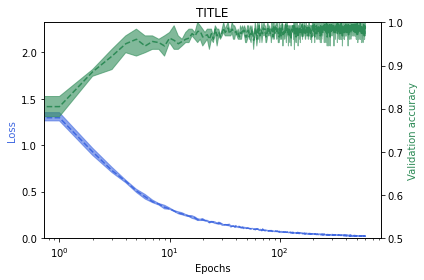

(3, 600) (3, 600)


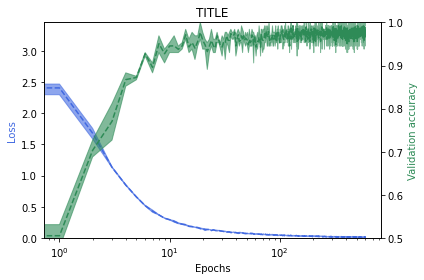

In [125]:
loss = np.genfromtxt("Runs/all lossesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesBatch normalization - ADAM200epochs-0.01LR.csv",delimiter = ",")

plot_loss_and_acc(loss,acc,"TITLE","",True)


loss = np.genfromtxt("Runs/all lossesNormal - ADAM200epochs-0.01LR.csv",delimiter = ",")
acc = np.genfromtxt("Runs/all accuraciesNormal - ADAM200epochs01LR.csv",delimiter = ",").reshape((3,600))

plot_loss_and_acc(loss,acc,"TITLE","", True)


# loss = np.genfromtxt("Runs/all lossesNormal - SGD200epochs.csv",delimiter = ",")
# acc = np.genfromtxt("Runs/all accuraciesNormal - SGD200epochs.csv",delimiter = ",")

# acc = np.expand_dims(acc,0)
# loss = np.expand_dims(loss,0)
# # acc.shape

# plot_loss_and_acc(loss,acc,"TITLE","")


(3, 200) (3, 200)


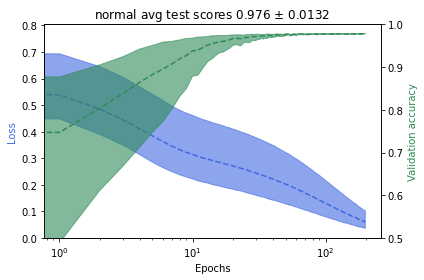

(3, 200) (3, 200)


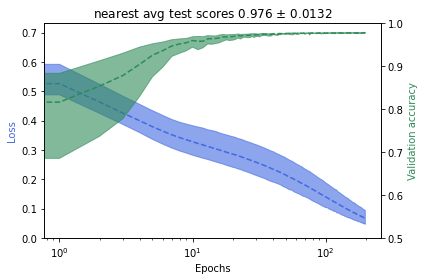

(3, 200) (3, 200)


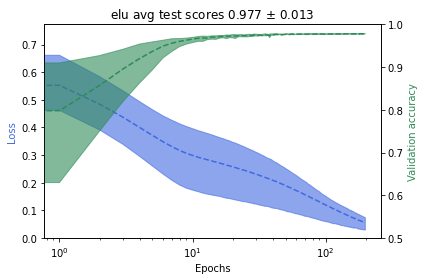

(3, 200) (3, 200)


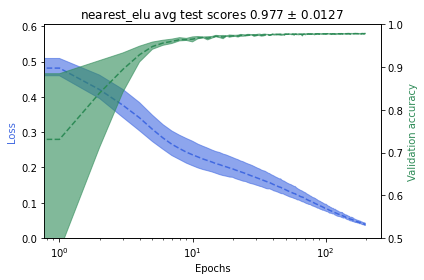

In [129]:
xray = np.load("Runs/xray_runs200epochs.npy",allow_pickle = True).item()



for type in xray.keys():
    loss = []
    acc = []
    for i in range(3):
        r = np.array(xray[type]["train_history"][i]["loss"])
        a = np.array(xray[type]['val_history'][i]['f1'])

        loss.append(r)
        acc.append(a)
    loss = np.array(loss)
    acc = np.array(acc)


    test = xray[type]["test_scores"]

    plot_loss_and_acc(loss,acc,type + f" avg test scores {np.mean(test):.3} $\pm$ {np.std(test):.3}","",True)



KeyError: 'test_scores'